## Import libraries and intitialize all parameters

In [1]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from map_utils import classification_mask, create_path_map

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel2").mundi_wms('L2A')

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(4, 5)


Define scl class legend. This will be used later to display the legend and interpret the terrain data.

In [2]:
legend_data = [[0, [0, 0, 0], 'No Data'],
              [1, [1, 0, 0.016], 'Saturated / Defective'],
              [2, [0.525, 0.525, 0.525], 'Dark Area'],
              [3, [0.467, 0.298, 0.043], 'Cloud shadows'],
              [4, [0.063, 0.827, 0.176], 'Vegetation'],
              [5, [1, 1, 0.325], 'Bare soil'],
              [6, [0, 0, 1], 'Water'],
              [7, [0.506, 0.506, 0.506], 'Clouds low probability / Unclassified'],
              [8, [0.753, 0.753, 0.753], 'Clouds medium probability'],
              [9, [0.949, 0.949, 0.949], 'Clouds high probability'],
              [10, [0.733, 0.773, 0.925], 'Cirrus'],
              [11, [0.325, 1, 0.980], 'Snow / Ice']]

legend_dict = dict()
for values in legend_data:
    legend_dict[values[0]] = values[2]


Define WMS parameters. We define here the bounding box, dates and images size that will be used for this first use case.

In [3]:
_projection_ = 'EPSG:4326'
_bbox_       = (1.3691896336775358, 43.45076739750934, 1.550892291377437, 43.52969044787278)
_time_       = '2023-02-06/2023-02-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

### Display SLC mask with its legend

In [4]:
# scl_array = np.asarray(Image.open(img_scl))

handles = [
    Rectangle((0,0),1,1, color = c) for k,c,n in legend_data
]
labels = [n for k,c,n in legend_data]

# plt.imshow(scl_array)
# plt.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Now lets try to simulate a route 

We will use the layer SCL_GRAYSCALE to get the raw scl value.
Then define a route and display it by replacing the pixel values to red.

start  (70, 124)
end  (199, 449)


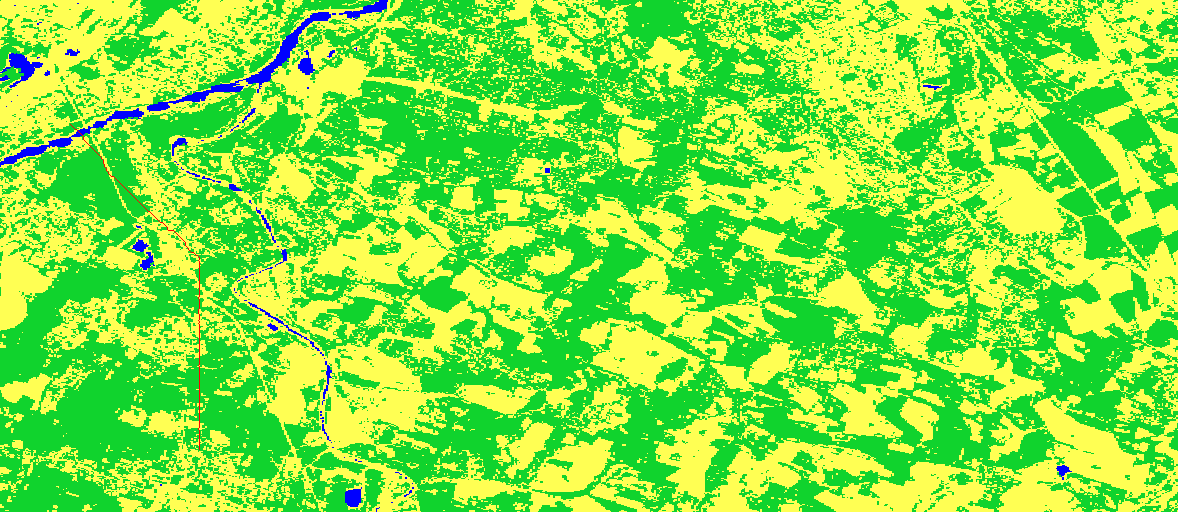

numpy.ndarray

In [5]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

img_scl_raw = wms.getmap(layers=['SCL_GRAYSCALE'],
                     srs=_projection_,
                     bbox=_bbox_,
                     size=(_width_, _height_),
                     format='image/tiff',
                     time=_time_,
                     showlogo=False,
                     transparent=False)

scl_raw_array = np.asarray(Image.open(img_scl_raw))
scl_array = np.asarray(Image.open(img_scl))

start = (1.38, 43.47)
end = ( 1.40, 43.52)
bbox = (1.3691896336775358, 43.45076739750934, 1.550892291377437, 43.52969044787278)
path = create_path_map(start, end, scl_array, bbox, 512)

writable_array = scl_array.copy()
for (x, y) in path:
    writable_array[y, x][:] = [255, 0, 0]

display(Image.fromarray(writable_array))
type(writable_array)

In [6]:
print(path)

[(70, 124), (71, 125), (72, 126), (73, 127), (74, 128), (75, 129), (76, 129), (77, 130), (78, 131), (79, 132), (80, 133), (81, 134), (82, 135), (83, 136), (83, 137), (83, 138), (83, 139), (84, 140), (85, 141), (86, 142), (87, 143), (88, 144), (89, 145), (90, 146), (91, 147), (92, 148), (93, 149), (94, 150), (95, 151), (96, 152), (97, 153), (98, 154), (99, 155), (100, 156), (101, 157), (101, 158), (102, 159), (103, 160), (103, 161), (103, 162), (103, 163), (104, 164), (104, 165), (104, 166), (105, 167), (106, 168), (106, 169), (106, 170), (107, 171), (108, 172), (108, 173), (109, 174), (110, 175), (111, 176), (112, 176), (113, 176), (114, 177), (115, 178), (116, 179), (117, 180), (118, 181), (119, 182), (120, 183), (121, 184), (122, 185), (123, 186), (124, 187), (125, 188), (126, 189), (127, 190), (128, 191), (129, 192), (130, 193), (131, 194), (132, 195), (133, 196), (134, 197), (135, 198), (136, 199), (137, 200), (138, 201), (139, 202), (140, 203), (141, 204), (142, 205), (143, 206), 